# Capstone Project: Real Estate Investment Trust

# Context: 

Our client is a large **Real Estate Investment Trust (REIT)** based in **New York State, USA**. They **invest** in houses/ apartments/ condos and as part of their business, they attempt to **predict a fair transaction price** for a property **before it is sold**. This is done to calibrate internal pricing models and to 'keep a pulse' on the housing market.

As things stand, they currently employ **independent appraisers** to evaluate a property and to provide an estimate on the price of the property based on the features of that property. However, the drawback of this approach is that the quality of the appraisers can **vary wildly**, and thus, so can their ability to **accurately predict** transaction prices. 

Inexperienced appraisers have, **on average, an error of 70K USD** between the predicted transaction price, and the actual transaction price. 

In order to eliminate any errors between the predicted and actual price, the client would like to replace the services of the appraisers with a machine learning model and they have hired us to develop that.


# Objectives: 

1) Explore the techniques involved in an entire **Machine Learning workflow** from start to finish.

2) Build a real estate pricing model to accurately predict transaction price with a **Mean Absolute Error (MAE) of < 70K USD.**

# Document Structure

We have followed **5 key steps** in our Machine Learning framework:

**Section 1** - Exploratory Analysis: This first step is meant to be quick, efficient and decisive with the end goal of allowing us to get to 'know the data'. We will uncover hints on how to approach data cleaning and which features to select for feature engineering.

**Section 2** - Data Cleaning: Before building any models, we will clean our dataset. In the real world, most datasets are 'messy', i.e., they may contain typos/ duplicate data/ measurement errors and need to be thoroughly cleaned before they can be used for analysis. 

**Section 3** - Feature Engineering: We will create 'new input features' from the existing features within our dataset. Once we go through this process, we will create an 'Analytical Base Table (ABT)' which will represent our dataset after it has been cleaned and augmented through feature engineering.

**Section 4** - Algorithm selection: We will consider three common machine learning regression algorithms, namely: 

- Linear Regression
- Regularized Regression
- Tree Ensemble Methods

**Section 5** - Model Training: We will examine the performance of each of these algorithms on our dataset whilst attempting to avoid overfitting through dataset splitting, pre-processing data pipelines and cross- validation.   

# Executive summary

After considering various linear regression algorithms, we found that the win condition of MAE < 70K USD can be achieved by a Random Forest algorithm. 

The MAE achieved was 68,116 USD and the corresponding $R^2$ value was 0.57.

## Section 1: Exploratory Analysis 

In this section, we will attempt to get to know the dataset as quickly as possible. As with most data science projects, we will continue with ad-hoc data exploration throughout the project, and hence, we do not need to be overly comprehensive up front.

### Part 1A: Basic Information

#### First, we'll import the relevant libraries which we will need 

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

#### Next, we'll read in the dataset

In [2]:
# Load real estate data from CSV
df = pd.read_csv('real_estate_data.csv')

#### Let's understand the dimensions of the dataset

In [3]:
# Dataframe dimensions
df.shape

(1883, 26)

We have 1883 rows of data and 26 input variables (or features) 

#### We should now examine the data types of our features to ensure that there are no abnormalities 

In [4]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

At a first glance, all features seem to have the 'expected' data type.

Numeric features are of the *'int64'* or *'float64'* data type whereas those with categorical features are of *'object'* data type.

**We can now display and examine the first and last five rows of our dataset in order to get a qualitative feel for the dataset.**

**At a first glance, we should look to see if**:

- The column headers and values within those columns make sense?
- Missing data will pose a problem?
- And so on...    

In [5]:
# Displays the first five rows
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,2002


In [6]:
# Displays the last five rows
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.000,0,0,0,0,3,0,0,1,46.000,76.000,87.000,1250.000,381.000,10.000,3.000,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.000,45,7,5,7,41,3,61,11,42.000,73.000,61.000,1553.000,473.000,9.000,3.000,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.000,5,1,1,1,8,2,1,2,43.000,87.000,66.000,942.000,287.000,8.000,1.000,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.000,18,2,4,0,5,1,8,6,43.000,61.000,51.000,803.000,245.000,5.000,2.000,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.000,0,0,0,1,2,2,0,5,37.000,80.000,86.000,1459.000,444.000,9.000,3.000,2015


#### There do not appear to be any causes for  concern based on the data that we have seen above.
Let's move on to visualizing our data.

### Part 1B: Distributions

**Distributions are helpful as they allow us to visualize our data. For example, a histogram will allow us to see all possible values for a feature in our dataset and the frequency of their occurrences.** 

**We should look for surprising observations such as:**

- Outliers
- Invalid data values
- Features with sparse data 
- Etc...

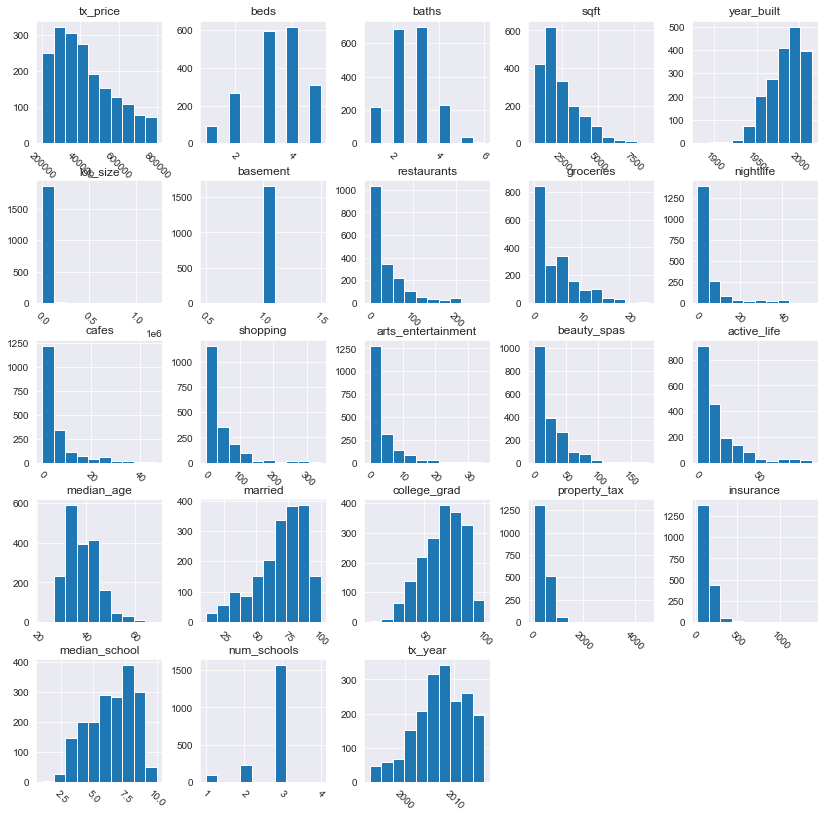

In [7]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)
plt.show()

#### At a high- level, the histogram distributions do not elucidate any clear imperfections in the data. However, we must remember that the histogram bins encompass a wide variety of values and hence we cannot pinpoint exact values. 

For example, this dataset is from the year 2016 and thus, no properties within this dataset can have a value for the feature *'year_built'* in excess of 2016 as that would indicate a measurement error. 

To help us with our analysis here, we can view summary statistics for **numerical features**. Summary statistics will provide us with statistics such as the mean, standard deviation, interquartile range etc. for each of our numerical features. 

In [8]:
# Display summary statistics for numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1657.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000
mean,422839.808,3.421,2.580,2329.399,1982.964,13392.620,1.000,40.210,4.505,5.075,5.325,40.802,3.394,23.417,15.835,38.601,69.092,65.086,466.777,140.454,6.503,2.793,2007.112
std,151462.593,1.069,0.946,1336.992,20.296,44949.304,0.000,46.867,4.491,8.465,7.539,53.539,4.700,25.777,17.668,6.634,19.660,16.953,231.657,72.930,1.996,0.505,5.197
min,200000.000,1.000,1.000,500.000,1880.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,1993.000
25%,300000.000,3.000,2.000,1345.000,1970.000,1542.000,1.000,7.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,58.000,54.000,320.000,94.000,5.000,3.000,2004.000
50%,392000.000,3.000,3.000,1907.000,1986.000,6098.000,1.000,23.000,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,426.000,125.000,7.000,3.000,2007.000
75%,525000.000,4.000,3.000,3005.000,2000.000,11761.000,1.000,58.000,7.000,6.000,6.000,51.000,5.000,35.000,21.000,43.000,84.000,78.000,569.000,169.000,8.000,3.000,2011.000
max,800000.000,5.000,6.000,8450.000,2015.000,1220551.000,1.000,266.000,24.000,54.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,2016.000


#### From the above: 

Examining the *'year_built'* feature, it is clear that the max value which occurs is 2015 and hence, there are no values exceeding the year 2016 (or measurement errors for this feature).

Scanning through the other features shows us that:

1) Excluding the *'basement'* feature, all features have an overall count of 1,883 (number of rows in the dataset)

2) The *'basement'* feature has a count of 1,657 which is lower than the count of the other features (1,883) and indicates that there are **missing values** within the dataset - we will tackle this issue in Section 2.

**We can also examine the summary statistics and distributions for categorical features**

In [9]:
# Display summary statistics for categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


The above statistics are helpful at a high level, however, they do not allow us to see whether there is sparse/ messy data within our features. Let's take a step further and visualize our features.

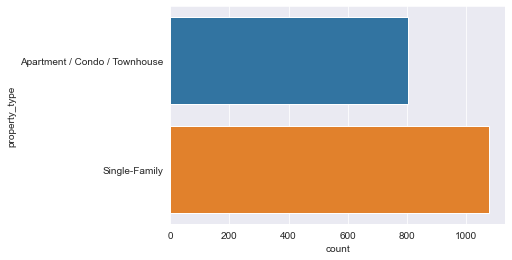

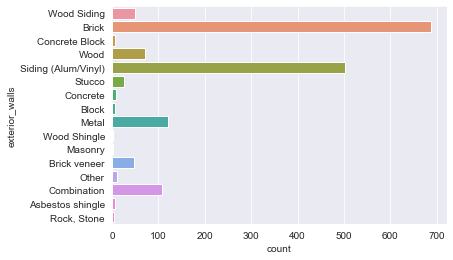

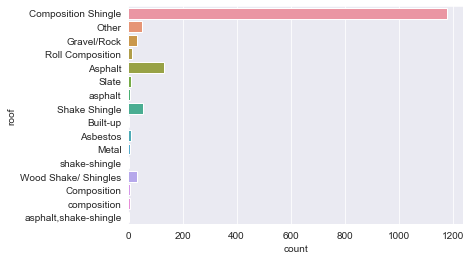

In [10]:
# Plot bar chart for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

1) There appear to be **sparse classes** in both the *'exterior_walls'* and *'roof'* feature. For example, within each feature, the following counts are very small or zero:

- Concrete Block (exterior_walls)
- Concrete (exterior_walls)
- Block (exterior_walls)
- Slate (roof)
- asphalt (roof)
- Metal (roof)
- etc.

2) Sparse classes can be problematic because they may cause our model to **overfit** further down the line. These classes will be addressed in Section 3.

### Part 1C: Segmentations

####  We should now look to segment our data to derive any insights between categorical and numeric features. Let's begin by segmenting the target feature by our categorical variables.

<AxesSubplot:xlabel='tx_price', ylabel='property_type'>

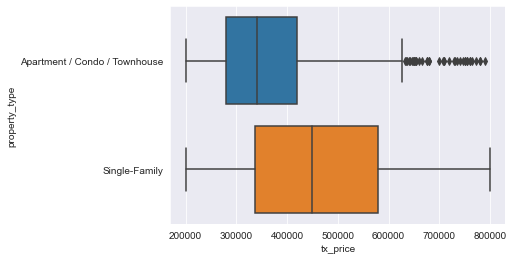

In [11]:
# We will begin by segmenting the tx_price by property_type and view the results via a boxplot
sns.boxplot(y='property_type', x='tx_price', data=df)

From the above, we can see that:

- Single- family homes are more expensive than apartments
- There is greater variation in price for the single- family homes vs apartments
- There is a greater range of values for the single- family homes vs apartments

We should also look to compare the *property_type* across features other than our target variable.

### Part 1D: Correlations

**Correlation** is a statistic that measures the degree to which two variables move in relation to each other. Correlation returns values a range between -1 and 1. 

Correlation may be either positive or negative; positive correlation means that as one feature increases, the other(s) increase, whereas negative correlation means that as one feature decreases, the other(s) decrease.

Correlation also has varying strengths:

- -1 or 1 indicate a **strong** negative/ positive correlation
- Those near 0 indicate a **weak** relationship
- 0 indicate **no** relationship 



#### Finally, let's take a look at the correlations between numeric features and other numeric features.

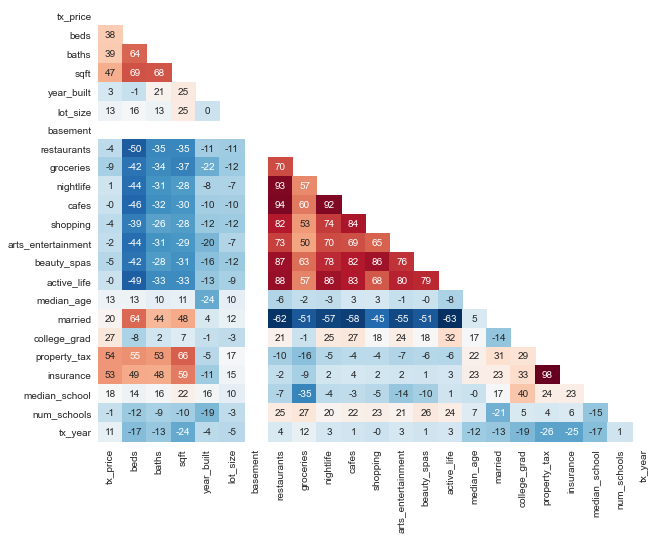

In [12]:
# Calculate correlations between numeric features
correlations = df.corr()

# Change color scheme
sns.set_style("white")

# Increase the figsize to 10 x 8
plt.figure(figsize=(10,8))

# A corrleation matrix is a symmetrical matrix and hence the top triangle can be removed from the plot without losing any information
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

# Plot heatmap 
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar=False)
plt.show()

We should begin the interpretation of this correlation heatmap by observing the correlation between our **target feature, 'tx_price'** and the remaining ones. 

Scanning vertically down the first column and looking for 'dark red' (strong positive correlation) or 'dark blue' (strong negative correlation) boxes **does not reveal any strong correlation with our target feature**. However, there is a **weak positive correlation** between *'tx_price'* and *'property_tax'*.

We can also observe that there is **strong positive correlation** between 'entertainment related activities' such as *nightlife* and shopping and 'dining outlets' such as *restaurants* and *cafes*. This is fairly intuitive as both activities are complementary to one another.

Similarly, there appears to be very **strong negative correlation** between 'entertainment related activities' and 'dining outlets' with whether a couple is *'married'*. Once again, this is fairly intuitive as the marital status of couples is unlikely to influence whether they enjoy entertainment or dining.

## Section 2: Data Cleaning 

**Data cleaning** is an essential first step in the process of building a machine learning model. In this process, we will fix or remove incorrect, corrupted, duplicate or incomplete data.

We will adopt the following approach:

- Drop unwanted observations 
- Fix structural errors
- Remove outliers 
- Handle missing data



### Part 2A: Drop unwanted observations

We can define unwanted observations as those which are either **duplicate in nature or completely irrelevant**. Duplicate observations, as the name suggests, are observations which are identical to another observation within the dataset. With regards to this task, completely irrelevant observations would be those which, for example, would relate to commercial properties and not residential ones.

#### Let us begin by dropping duplicate observations 

In [13]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(1883, 26)


Applying *'drop_duplicates'* leaves the size of the dataset unchanged, thereby implying that **we do not have any duplicates values.**

#### Let us now determine if there are any completely irrelevant observations 

In [14]:
# Check for unique property types
print(df.property_type.unique())

['Apartment / Condo / Townhouse' 'Single-Family']


From the above, it is clear that they only property types are those which can be classified as residential and hence there are **no issues** here.

### Part 2B: Fix structural errors within the data

Structural errors typically occur during measurement or data transfer. Typical examples of these errors are odd naming conventions, typos, or incorrect capitalization. Whilst they may not seem critical, these inconsistencies can cause mislabeled categories or classes. 

Our *'basement'* feature in Section 1 showed us that it had only values of '1' or 'NaN'. 

**Let us fix this problem and convert the NaN's to 0's.**

In [15]:
# Display unique values of 'basement'
print( df.basement.unique() )

[nan  1.]


In [16]:
# Replace missing basement values with 0
df.basement.fillna(0, inplace = True)

In [17]:
print(df.basement.unique())

[0. 1.]


#### Let us now check for inconsistent spelling such as typos or inconsistent capitalization
This is a common concern for categorical features 

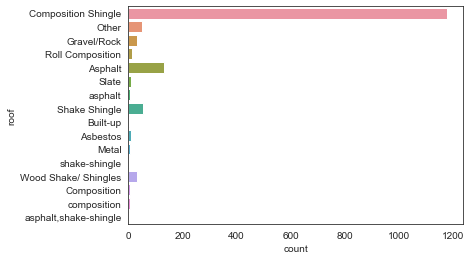

In [18]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

From the above, we can see that:

- 'composition' should be 'Composition'
- 'asphalt' should be 'Asphalt'
- 'shake-shingle' should be 'Shake Shingle'
- We can also change 'asphalt, shake-shingle' to 'Shake Shingle'

Let's make those changes now 

In [19]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

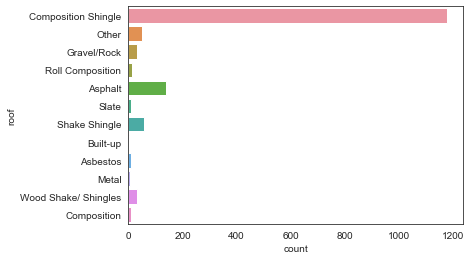

In [20]:
# Class distribution for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

From the above, we can see that our distribution looks much cleaner now!

#### Finally, we'll check for incorrect labeling of classes, i.e., multiple features that should be within the same class but are nevertheless labeled into separate features. 
For example: 'N/A' and 'Not Applicable' should be in the same class. We will apply the above to the **'exterior_walls'** feature where we can group:

- 'Rock' and 'Stone' to 'Masonry'  
- 'Concrete' and 'Block' to 'Concrete Block'

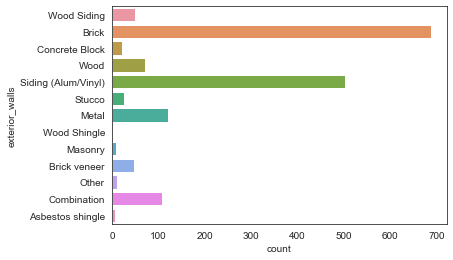

In [21]:
# 'Rock, and 'Stone' should be grouped under 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

### Part 2C: Remove Outliers

Model performance is generally **improved** if there are no outliers which can distort its performance. Outliers should be removed provided there is justification to do so.

Typical reasons may be as follows:

1) **Dubious measurements** that are unlikely to correct e.g., a negative value for a transaction price.

2) Values which differ by **orders of magnitude** for the type of property, e.g., if most properties range from between 100,000- 500,000 sqft, and another property has a size of 1,000,000 sqft.

3) **Model purpose** - If most of properties range from between 100,000- 500,000 sqft, then including a property of 1,000,000 sqft+ will hinder model performance more than it will help it.

We can check for outliers through a variety of methods - the most common are:

a) **Box plot (Standard)**

b) **Violin plot (Recommended)**

#### Option a) Box plot

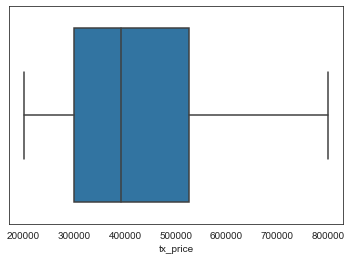

In [22]:
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.show()

Box plots are useful as they provide us with the:

- The min and max values through the two vertical bars on the ends 

- The interquartile range (25th percentile to 75th percentile) through the box in the middle

- The median through the vertical bar in the middle of the box 

- A quick and easy way to identify any potential outliers

We will see another, slightly more enhanced box plot offered within Seaborn's library named a violin plot. This plot offers the advantages of a box plot, and in addition, also shows the entire probability distribution of the data.   

#### Option b) Seaborn's Violinplot (Recommended)

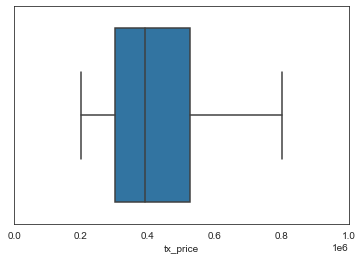

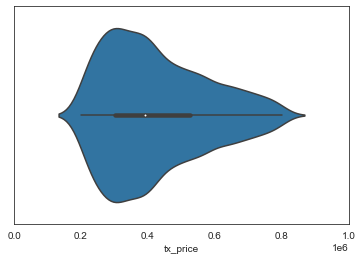

In [23]:
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000) # setting x-axis range to be consistent
plt.show()

# Violin plot of'tx_price' using the Seaborn library
sns.violinplot('tx_price', data=df)
plt.xlim(0, 1000000) # setting x-axis range to be consistent
plt.show()

In the violin plot: 

- The thin horizontal bar represents the range (min to max) of the data
- The thick horizontal bar is the interquartile range (25th percentile to 75th percentile)
- The white dot is the median
- Finally, the thickness of the "violin" represents the estimated probability density.

From the violin plot for *'tx_price'*, no possible outliers are immediately discernible. 

Nonetheless, we will now look for outliers in our other non- target variables.

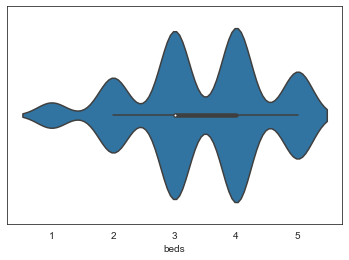

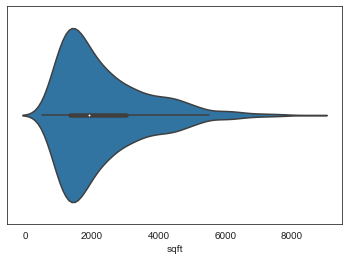

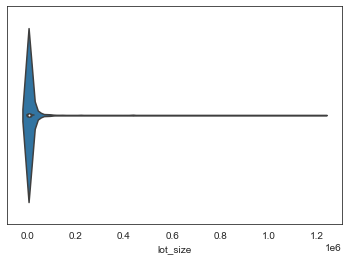

In [24]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

From the 3 violin plots above, it would appear that only **lot_size** has a potential outlier.

This is readily apparent given the long tail (indicating a large value) and a thin tail (indicating that the probability of this value existing is very low).

We can now look at the top few values within the data to confirm this.

In [25]:
# Display the top 5 values in descending order
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft whereas the second largest has a lot_size of only 436,471 sqft. This once again raises suspicions that the largest property is indeed an outlier. We will now look more closely at the largest property and all of its associated features.

In [26]:
df[df.lot_size == df.lot_size.max()]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,NaN,0.000,63,11,11,8,39,18,42,44,33.000,35.000,87.000,230.000,79.000,6.000,3.000,2014


Although the property is a two-bedroom apartment and only sold for under 300K USD, the property has a *lot_size* in excess of 1,000,000 sqft. Hence, it's very likely that this property's *lot_size* measure is an error and an outlier. With high confidence, we can remove this observation from the data as all other values have a *lot_size* < 500,000 sqft.

In [27]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]
print( len(df) )

1882


### Part 2D: Handling Missing Data 

**Missing data** must be addressed, as machine learning algorithms **cannot accept** 'missing' input values.

In order to address the issue of missing data, we should label those values as **'missing'**. Through this method, we essentially add a new feature to our dataset. 

For **categorical** features, we essentially replace the missing values with an **'na'**.

For **numerical** features, we can flag each row with a missing value with a **'0' or '1'** indicating 'not missing' and 'missing' respectively. Through this approach, we allow the algorithm to estimate the optimal parameter for missingness, instead of just replacing it with the mean of the incumbent data values.

There are two methods that we should avoid:

1) Simply 'dropping' or removing values because they are not present. The drawbacks of this approach are: 

- By definition, we **remove information** from our dataset
- We often find ourselves in situations where we need to make **predictions on new data** despite missing some features
    
2) Imputing values. The drawbacks of this approach are: 

- Filling in a missing field with a value leads to a **loss of information** regardless of the sophistication of the imputation     
- Missing values can be **predicted by the model**
- A sophisticated model could impute values, however, this does not add any further information as it simply **reinforces patterns already provided** by other features.

**Let's begin by identifying missing data values for our categorical features**

In [28]:
# Display number of missing values for categorical features
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

Both *'exterior_walls'* and *'roof'* have missing values and we can replace these with 'na' values.

As stated above, we will simply label the null values as as 'Missing'. 

This method is harmless as we've only added a new class to the feature set whilst also maintaining the information that the original value was missing to begin with.

In [29]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

In [30]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

**Let's now address any missing values in our numerical features**

In [31]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Fortunately, it looks like no numerical features have missing values in this dataset! Let's save this cleaned dataframe.

In [32]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)

## Section 3: Feature Engineering

Feature engineering allows us to create informative features by **utilizing specific domain knowledge**. 

For example, an expert may inform us that:

- Transaction price is influenced by the number of quality schools nearby 
- Investors are especially interested in properties with two bedrooms and two baths
- Transaction prices have dipped during due a slowdown in the economy (i.e., during a recession)

Hence, we could **create features** to represent as much. 

Further, we can engineer new, more useful features through manipulating our existing features. For instance, we know the transaction year and the year the property was built in. However, just knowing the year built alone is not so useful, unless we suspect that there was an issue with all the properties built in a particular year.

Instead, we can combine these two features to provide us with the age of the property at the time of the transaction. 

Finally, we can also use feature engineering to alter the representation of categorical features so that they can be readily passed into our machine learning algorithm.

### Part 3A: Features motivated by domain knowledge

As mentioned above, let's create variables showing us: 

- An overall school score representing the number of quality schools near a property
- Properties with two bedrooms and two baths  
- Which transactions occurred during the housing market recession
- The age of any given property  

Let's also create a new feature combining both the transaction year and the year the property was built.

In [33]:
# An overall school_score variable defined as the number of schools  
df['school_score'] = df.num_schools * df.median_school

The overall school score can be calculated as the **product** of the number of schools and the median quality of those schools.

The added benefit of this approach is that it provides greater perspective on not only the number of schools near a property but also the quality of those schools.

In [34]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

According to **Zillow** (a company which contains information on the USA housing market), there was a **housing market recession** between 2010 and 2013 which means that we can represent this information through an indicator variable. This information is important for us to know as during the recession, it is likely that the transaction price would be lower than in other periods.

In [35]:
# An indicator feature representing the number of transactions which occurred between 2010 and 2013 
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

Let's create an additional feature to help us do some further data cleaning. We will create a feature to describe the **age of a property** and check for its corresponding minimum value. If the lowest value of the feature is less than 0, this would indicate that the property was bought before it was constructed. Properties which are bought before they have been constructed **can be removed** from our dataset as we are only focused on properties that already exist as our client only invests in properties which are **already in the market**.

In [36]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

In [37]:
print( df.property_age.min() )

-8


As the above value is negative, this suggests that we have observations within our data that we **need to remove.**

In [38]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print( len(df) )

1863


### Part 3B: Group Sparse Classes

**Sparse classes** are classes in categorical features that have **very few or zero** total observations.

They can cause certain machine learning algorithms to overfit and hence we should attempt to reduce the number of sparse classes in our categorical features.

We will now address this issue within the *'exterior_walls'* and *'roof'* features.

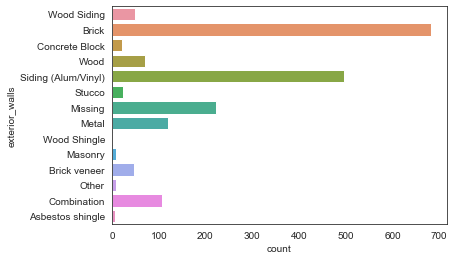

In [39]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

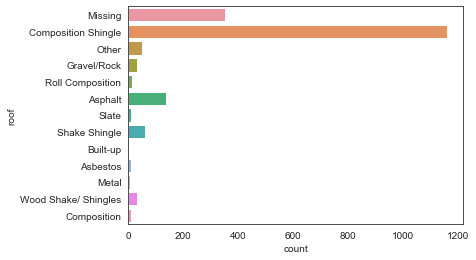

In [40]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

From the above, it is clear that certain classes have a minimal number of observations and that they can be grouped together:

Within the feature *exterior_walls*:
- ('Wood Siding', 'Wood Shingle' & 'Wood') can be grouped as just 'Wood'.
Within the feature *roof*:
- ('Composition' & 'Wood Shake/ Shingles') can be grouped as just 'Composition Shingle'.

In [41]:
# Group ('Wood Siding', 'Wood Shingle' & 'Wood') together as just 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood',inplace = True)

# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'],'Composition Shingle', inplace=True)

We can also group the remaining classes into a new category named 'Other' within both features respectively.

In [42]:
# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

We can now view the new, 'cleaned up' distribution with the sparse classes all grouped together.

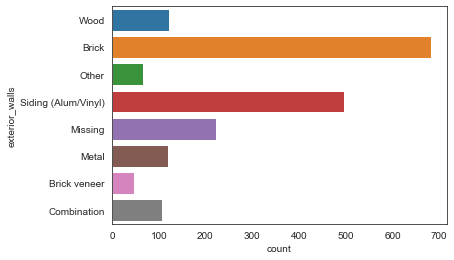

In [43]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

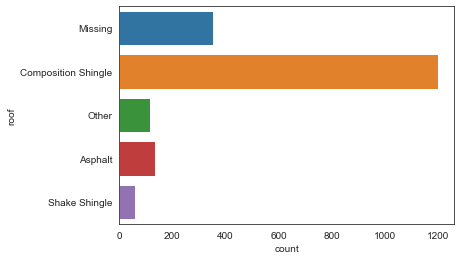

In [44]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

Each of the classes within the feature now has a few observations which means that we are unlikely to be at a risk of overfitting due to sparse classes. Although, there is no rule of thumb, data scientists typically recommend combining classes together until each class has **at least 50 overall observations**.

### Part 3C: Creating the Analytical Base Table (ABT)

Once we have finished our feature engineering tasks then we can create a new dataframe, the **Analytical Base Table**, which we will eventually feed into our algorithms. We are close to forming this table, however, before we get there, we need to address how we can convey the information provided by text data to our algorithms. This is because Python Machine Learning algorithms **cannot handle text data** for modeling purposes, we need to identify categorical variables through the use of **dummy variables**. For example, for the roof feature, we would need to create a dummy variable for each class:

- roof_Missing 
- roof_Composition_Shingle
- roof_Other
- roof_Asphalt
- roof_Shake_Shingle

and if a data point had a roof made of 'Shingle', then the dummy variables would be populated as shown below:

- roof_Missing = 0 
- roof_Composition_Shingle = 1
- roof_Other = 0
- roof_Asphalt = 0
- roof_Shake_Shingle = 0

In [45]:
# Create new dataframe with dummy features
abt = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

Finally, we'd like to remove redundant features, for example, those that have can be replaced by other, more informative features. For example, since the *'property_age'* feature is a function of *'tx_year'* and *'year_built'*, we can remove both of the latter two features.

It is also in our interests to remove *'tx_year'* as we would like to avoid the model being overfit to the transaction year, as it will be used as an input for properties moving forward.

In [46]:
abt

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,school_score,two_and_two,during_recession,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,2013,27.000,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,2006,9.000,0,0,41,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,2012,24.000,0,1,49,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,2005,27.000,0,0,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,2002,27.000,0,0,10,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,760000,5,5,7842,2003,436035,1.000,0,0,0,0,0,0,0,0,48.000,76.000,62.000,881.000,249.000,7.500,2.000,2008,15.000,0,0,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1879,690000,5,6,6501,1956,23086,1.000,45,7,5,7,41,3,61,11,42.000,73.000,61.000,1553.000,473.000,9.000,3.000,2015,27.000,0,0,59,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1880,600000,5,6,7064,1995,217800,1.000,5,1,1,1,8,2,1,2,43.000,87.000,66.000,942.000,287.000,8.000,1.000,1999,8.000,0,0,4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1881,759900,5,6,7500,2006,8886,1.000,18,2,4,0,5,1,8,6,43.000,61.000,51.000,803.000,245.000,5.000,2.000,2009,10.000,0,0,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [47]:
# Drop 'tx_year' and 'year_built' from the dataset
abt.drop(['tx_year', 'year_built'], axis=1, inplace=True)

#### We can now save the analytical base table

In [48]:
# Save analytical base table
abt.to_csv('analytical_base_table.csv', index=None)

## Section 4: Algorithm selection

In this section, we will explore the **various algorithms** which we can use for our model and their associated **advantages and disadvantages**.

In particular, we will focus on:

- **Linear regression**
- **Regularized regression**
- **Tree Ensemble methods** 

In order to showcase each algorithm, we will consider their performance on a **randomly generated noisy dataset**.

In general, it is better to allow more **freedom for complexity** in models and then to **create conditions to prevent against overfitting**. This is because **simple models** will struggle to **accurately reflect** the underlying pattern of the data and the **more complex** the model, the **greater the number of tools** we have in order to prevent against overfitting. 

### Part 4A: Linear regression

**Linear regression** is a linear approach to modeling the relationship between the **dependent variable and one or more independent variables** in question. The most common method for fitting a regression line and determining the coefficients of the line is through the **method of ordinary least squares, (OLS)**. 

This method works through calculating the best- fitted line for the observed data through **minimizing the sum of the squares of the vertical distance between the line and each of the data points**. The function we are attempting to minimize is commonly referred to as a **cost function**.

The key **advantages** of linear regression are in its **simplicity, interpretability and availability**. 

The main **disadvantages** of linear regression are:

1) It is susceptible to suffer from overfitting if there are **too many input features**

2) It struggles to express **non- linear relationships**

Let us explore both of these issues with the examples below:

#### Let's create a noisy sine dataset as our target feature which we will attempt to model with linear regression 

In [49]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.sin(x) + noise

# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})

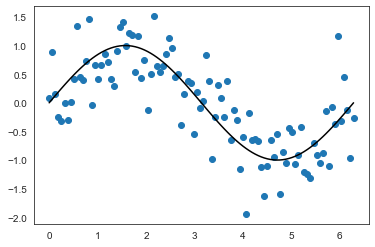

In [50]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color='k')

plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

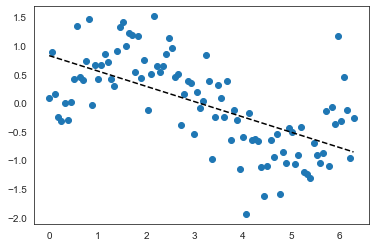

In [52]:
# Initialize model instance
lm = LinearRegression()

# Separate input feature(s) and target variable
X = df.drop('y', axis=1)
y = df.y

# Fit model
lm.fit(X, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lm.predict(X), 'k--')

plt.show()

The plot above is an example of simple linear regression. As we can see, the main advantage of this approach is that it is relatively simple to implement and easy to understand. However, the model itself is quite simple and **lacks the complexity** required in order to describe the underlying distribution well.

We could attempt to increase the complexity of the model through increasing the number of input features, i.e., adding in an $x^2$ or $x^3$ term would suffice, however, we then run the **risk of overfitting** our model.

#### Let's see this in action below

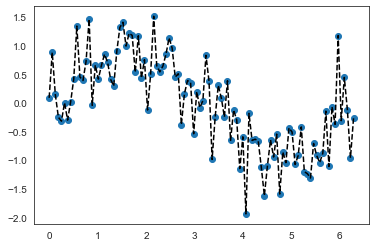

In [53]:
df_dummy = df.copy()

# Set seed for reproducible results
np.random.seed(555)

# Create 99 dummy features
for n in range(1, 100):
    df_dummy['g{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)

# Dummy input features
X_dummy = df_dummy.drop('y', axis=1)

# Fit model on dummy features
lm_dummy = LinearRegression()
lm_dummy.fit(X_dummy, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lm_dummy.predict(X_dummy), 'k--')

plt.show()   

As can be seen from above, we created a dummy dataset with 99 dummy features. We then attempted to model a noisy sine wave with 100 points and given that the **number of features closely resembled the number of data points**, we ended up overfitting our model!

As we have seen, increasing the number of input features is typically not the best approach to avoid overfitting. We need a way to avoid this problem, and we can achieve that through **Regularized Regression**.

### Part 4B: Regularized Regression 

**Regularization** is the name of the technique whereby we can attempt to prevent overfitting with linear regression by penalizing large model coefficients.

Model coefficients are penalized through a **penalty factor $\lambda$**, which is added to our cost function. The strength of this penalty term **can be altered** depending on the extent to which we would like to dampen coefficient values.

Note - the penalty factor is referred to as a hyperparameter. This is a parameter that is manually set by the model user and not one which is learnt by the model, unlike the model coefficients. We will refer to this again in the next section.

We will consider:

- L1 (Lasso regression)
- L2 (Ridge regression)
- Elastic- net regression

### L1 Lasso Regression

$C = \sum\limits_{i=1}^N (y_{i} - \hat{y_{i}})^2 +  \lambda\sum\limits_{j=1}^F |\beta_{j}|$

Lasso stands for **Least Absolute Shrinkage and Selection Operator**. It is a type of linear regression which uses shrinkage.

The advantages and disadvantages of Lasso regression can be viewed through the effect it has on model complexity and feature selection.

Lasso regression **advantages** are:

- It helps to prevent overfitting through **shrinking model coefficients** through the introduction of the penalty factor, **$\lambda$** and has the ability to **completely remove** certain features by shrinking their coefficient to zero
- As certain coefficients can be shrunk all the way to zero, it helps our model with **feature selection** as it can remove unnecessary features
- The removal of features can lead us to **sparse solutions** which is of great computational advantage 

However, the **disadvantages** of Lasso regression are:

- Removing features can be a problem if we have **collinear features**, i.e., features which are highly correlated with one another. In this scenario, Lasso may arbitrarily remove a feature which was otherwise important for us 

We can now see Lasso regression in action:

In [54]:
# Import Lasso Regression
from sklearn.linear_model import Lasso

In [55]:
lasso = Lasso(random_state=1234)
lasso.fit(X_dummy, y)

Lasso(random_state=1234)

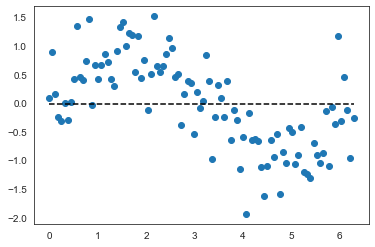

In [56]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lasso.predict(X_dummy), 'k--')

plt.show()

From the above, it may look like Lasso has underfit the underlying distribution, however, that is due to the fact that we have set our penalty factor to a very **high value**. We will vary the strength of the penalty and see how that affects the regression fit. 

(Please note that the penalty factor of $\lambda$ is referred to as *Alpha* within our Python environment.)

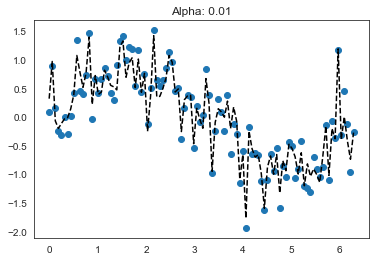

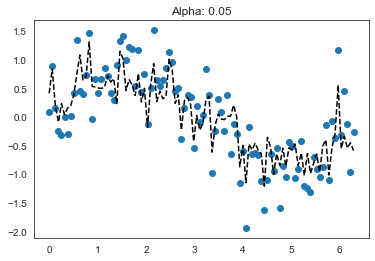

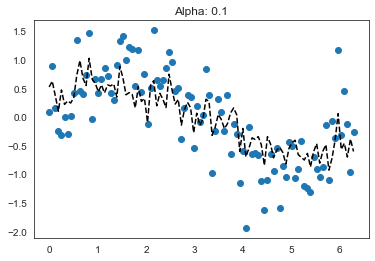

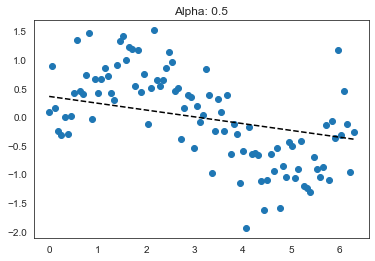

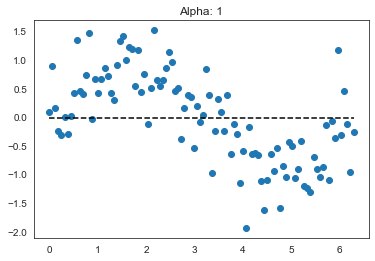

In [57]:
for penalty in [0.01, 0.05, 0.1, 0.5, 1]:
    lasso = Lasso(alpha=penalty, random_state=1234)
    lasso.fit(X_dummy, y)
    
    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, lasso.predict(X_dummy), 'k--')
    plt.title('Alpha: {}'.format(penalty))

    plt.show()

Based on a quick eyeball test, it looks like a penalty strength of 0.05 or 0.1 might be the most appropriate for the noisy sine dataset.

The above is an example of model tuning where we have varied our hyperparameter and evaluated performance based on an eyeball test. In reality, our hyperparameter values are arrived at in a more systematic manner through the process of cross- validation.

### L2 Ridge Regression

$C = \sum\limits_{i=1}^N (y_{i} - \hat{y_{i}})^2 +  \lambda\sum\limits_{j=1}^F \beta_{j}^2$

**Ridge Regression** is a similar technique to Lasso regression for preventing overfitting. However, the key difference is that the penalty factor for Ridge regression is $λ^2$ and not $λ$. 

Similarly to Lasso regression, the advantages and disadvantages of Ridge regression can be viewed through the effect it has on model complexity and feature selection.

Ridge regression **advantages** are:

- It helps to prevent overfitting through **shrinking model coefficients** through the introduction of the penalty factor, **$\lambda^2$** 
- Unlike lasso regression, the coefficients of our model will never actually reach zero which means that we will not remove features, but we will still minimize their impact on our model

However, the **disadvantages** of Ridge regression are:

- As coefficients never actually reach zero, we cannot conduct feature reduction and hence keep irrelevant features within our model
- As all features are retained, we require a greater degree of computational power in comparison to Lasso regression

We can now see Ridge regression in action:

In [58]:
# Import Ridge Regression
from sklearn.linear_model import Ridge

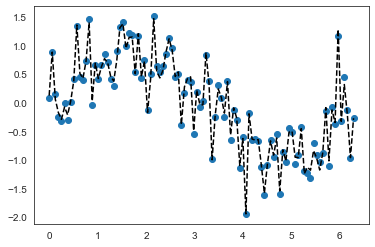

In [59]:
# Default alpha=1.0
ridge = Ridge(alpha=1.0, random_state=1234)
ridge.fit(X_dummy, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, ridge.predict(X_dummy), 'k--')
plt.show()

Clearly, a penalty value of 1.0 is not strong enough as our model is still overfit. We should increase the value of the penalty and see how that affects our fit.

(Please note that the penalty factor of $\lambda^2$ is referred to as *Alpha* within our Python environment.)

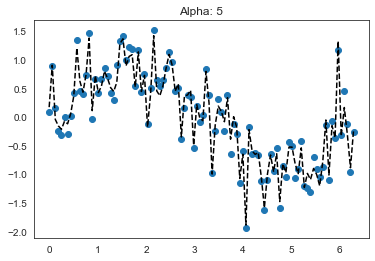

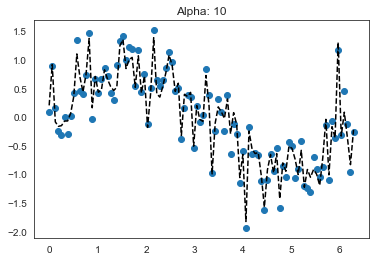

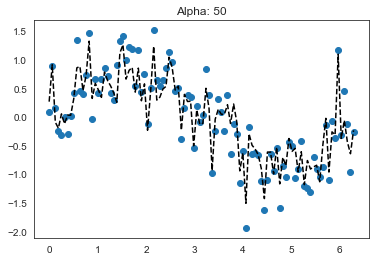

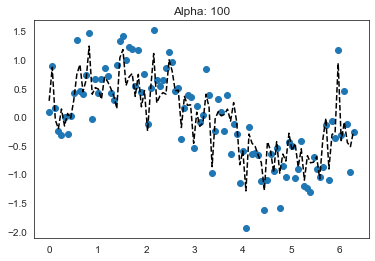

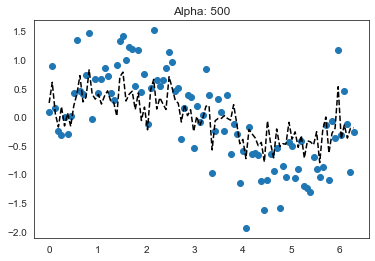

In [60]:
for penalty in [5, 10, 50, 100, 500]:
    ridge = Ridge(alpha=penalty, random_state=1234)
    ridge.fit(X_dummy, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, ridge.predict(X_dummy), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    plt.show()

Based on a quick eyeball test, it looks like a penalty strength of 100 or 500 would be the most appropriate.

### Part 4C: Elastic- Net 

$C = \sum\limits_{i=1}^N (y_{i} - \hat{y_{i}})^2 +  \lambda_{1}\sum\limits_{j=1}^F |\beta_{j}| + \lambda_{2}\sum\limits_{j=1}^F \beta_{j}^2$

Elastic-Net regression **linearly combines** both Lasso and Ridge regression models and allows us to vary the extent to which our Elastic-Net model will perform like either of the algorithms. 

This is achieved through the hyperparameter *l1_ratio* which ranges between 0-1. Values **close to 0** indicate that our algorithm will behave like Ridge regression, whereas values **close to 1** resemble behavior more akin to Lasso regression. 

The main **advantage** of Elastic-Net regression is that it encompasses the benefits of both Ridge and Lasso regression whilst having even better **predictive power** than Lasso. However, a **disadvantage** is that it is **computationally more expensive** than either algorithm by itself.

We can now see Elastic-Net regression in action:

In [61]:
# Import Elastic Net
from sklearn.linear_model import ElasticNet

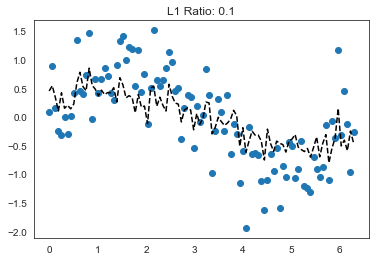

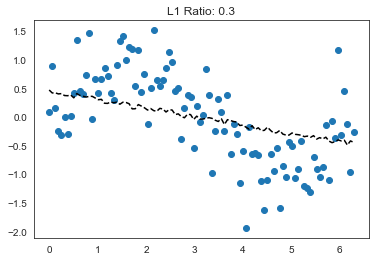

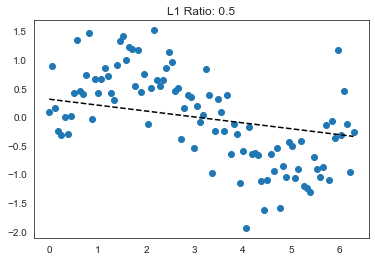

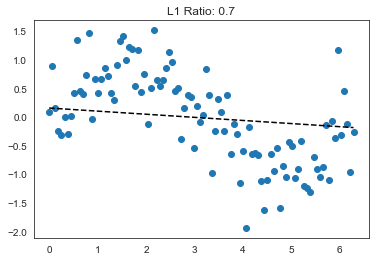

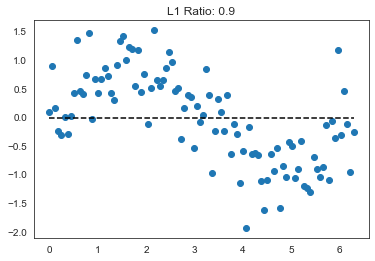

In [62]:
for ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
    enet = ElasticNet(l1_ratio=ratio, random_state=1234)
    enet.fit(X_dummy, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, enet.predict(X_dummy), 'k--')
    plt.title('L1 Ratio: {}'.format(ratio))
    plt.show()


Ranging the *l1_ratio* values from 0.1 all the way to 0.9 allows us to see how the Elastic- Net fit changes. As mentioned earlier, with a value of 0.1, the model is much closer to resembling Ridge regression, whereas as we approach a *l1_ratio* of 0.9, we resemble Lasso regression.

### Part 4D: Ensemble Methods 

So far, we have been able to consider three different linear regression methods and the way with which we can tackle overfitting. 

However, we still have not yet considered the second limitation of linear regression which is the ability to **express non- linear relationships in a simple manner**.

In order to tackle this problem, we can turn our attention towards **Decision Trees and Random Forests**.

Decision Trees build **regression models** in the form of a **tree structure**. It does this breaking a dataset into smaller and smaller segments based on our target variable. This provides us with a greater deal of **flexibility** in our model which means that we can explain **very complex** relationships. We won't delve into too much detail of the theory but will see how they work in practice. 

### Decision Trees

Let us see how a decision tree performs on the same noisy sine data 

In [63]:
from sklearn.tree import DecisionTreeRegressor

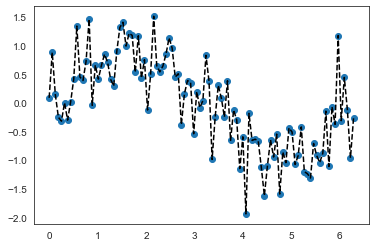

In [64]:
dt = DecisionTreeRegressor()
dt.fit(X_dummy, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, dt.predict(X_dummy), 'k--')
plt.show()

Unfortunately, it would appear as if though our decision tree has overfit our data.

Although decision trees provide us with a greater deal of flexibility, they are also prone to overfitting. This occurs either if the number of branches within the tree can grow without limitation i.e., **an unconstrained decision tree**, or when the number of branches is just generally too high. If a tree is unconstrained, it can make as many splits as necessary and will eventually **memorize the training data** (which is what has happened in the above example).

We can tackle the problem of overfitting in two ways: 

1) Constrain the maximum depth allowed for the tree i.e., the number of times a tree can branch before it arrives at a prediction

2) Set a minimum number of samples that must be present at any leaf

3) Combine the predictions from many constrained decision trees. This is referred to ensembling the decision trees.

#### Let us begin by reducing the maximum depth allowed for the tree and how that affects our model  

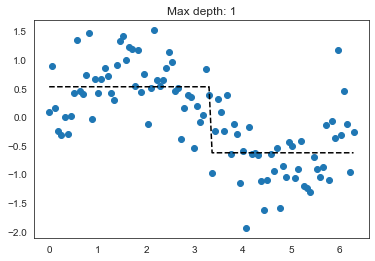

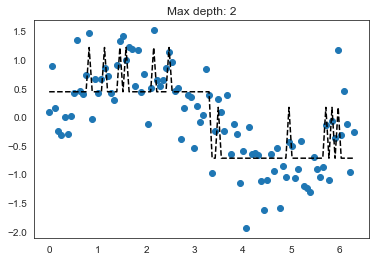

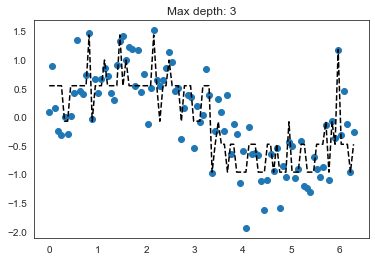

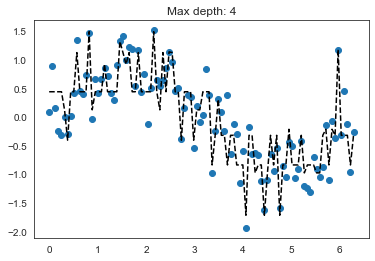

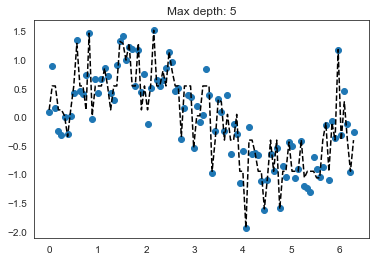

In [65]:
for depth in [1, 2, 3, 4, 5]:
    dt = DecisionTreeRegressor(max_depth = depth)
    dt.fit(X_dummy, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, dt.predict(X_dummy), 'k--')
    plt.title('Max depth: {}'.format(depth))
    plt.show()

As we can see from above, if we reduce the 'Max depth' (or the number of branching splits which a tree can take before arriving at a prediction), then we are able to achieve a better model fit. 

#### Let us now see the affect of constraining the minimum number of samples at each leaf

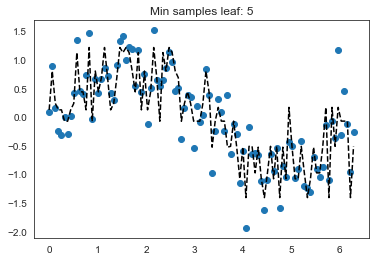

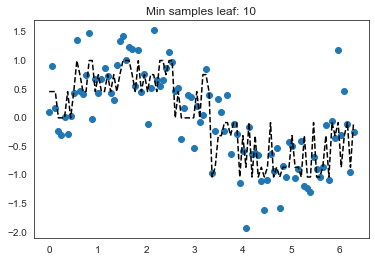

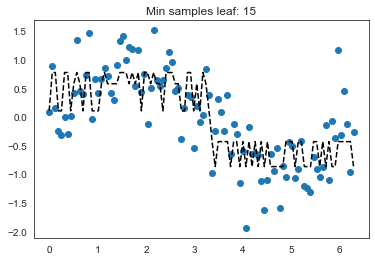

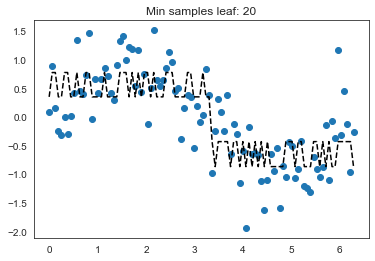

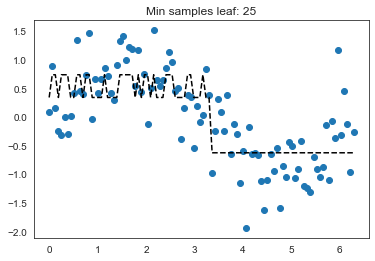

In [66]:
for leaf in [5, 10, 15, 20, 25]:
    dt = DecisionTreeRegressor(min_samples_leaf = leaf)
    dt.fit(X_dummy, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, dt.predict(X_dummy), 'k--')
    plt.title('Min samples leaf: {}'.format(leaf))
    plt.show()

Similarly, through increasing the number samples per leaf, we are able to achieve a fit which is much smoother. The key difference from the earlier plots is that the tree can have as many branches as necessary provided that the condition stipulating the minimum number of samples at each leaf is met.

#### Finally, let's view the tree ensemble method 

### Random Forests

Random Forest's contain a **large number of individual decision trees** that operate as an ensemble. Each individual tree in the random forest is trained in parallel on a **random** selection of observations and the prediction from each tree is aggregated into a **single decision tree**. 

The fundamental reason as to why a Random Forest works so well is due to the fact that a large number of uncorrelated  trees operating together **outperform any tree working by itself**. While some trees will make erroneous predictions, others will be correct and as a whole, the trees will move in the correct direction.

The end result is that the predictions made by the random forest are more **smooth** and it allows for protection against overfitting.

By default, Random Forest's fit 10 decision trees. We can go a step further and set a threshold for the minimum leaf size within each tree itself. 

In [67]:
from sklearn.ensemble import RandomForestRegressor

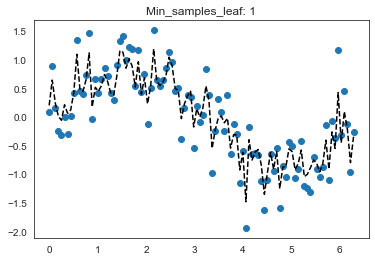

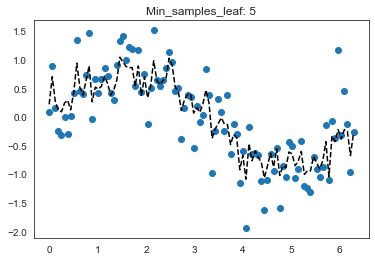

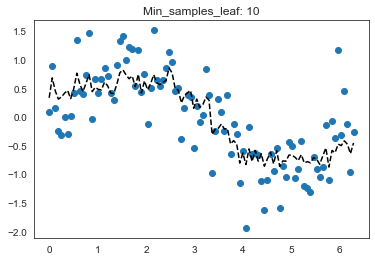

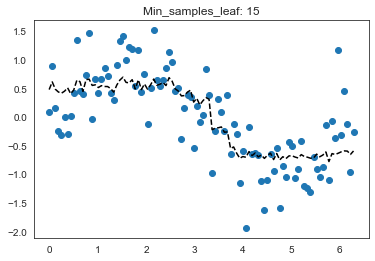

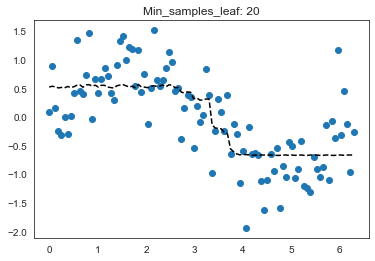

In [68]:
for leaf in [1, 5, 10, 15, 20]:
    rf = RandomForestRegressor(min_samples_leaf = leaf, random_state = 123)
    rf.fit(X_dummy, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, rf.predict(X_dummy), 'k--')
    plt.title('Min_samples_leaf: {}'.format(leaf))
    plt.show()

As can be seen from the plots above, the random forest returns a much more smooth looking output in comparison to single decision trees.

In general, random forests tend to perform very well. This is because:

- They are easy to implement and use in comparison to other models
- They are very reliable and tackle overfitting very well
- Default hyperparameters produce good results and there are only a few which need to be learnt

#### Now that we have explored the various linear regression techniques, let us now test their performance on our analytical base table!

## Section 5: Model Training

A crucial part of our analysis involves us **splitting** our dataset into **training** and **test** data. We do this in order to 'train' our model to learn the underlying relationship between our variables and we then 'test' the models performance on our test dataset. 

**Note - we cannot use the same data to both train and test our model!**

**Let's import packages which will be relevant in this section**

In [69]:
# Import Regularized Regression algorithms 
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Function to split training and test set
from sklearn.model_selection import train_test_split

#### Let's begin by loading in our analytical base table 

In [70]:
# Let's load in our analytical base table
df = pd.read_csv('analytical_base_table.csv')

#### Let's create variables for our target and input features

In [71]:
# Our target variable 
y = df.tx_price

# Our input features 
X = df.drop('tx_price', axis = 1)

In [72]:
# Let's now also split our data points into training and test data (20% of our data can be used for test data and the remainder for training data)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [73]:
# Let's check that the sum of the size of the training and test data equals the size of the overall dataset
(len(X_train) + len(X_test))== len(df)

True

We're nearly ready to evaluate our model on our test set. Just before we get there, we need to define how we will evaluate the model's performance and this will be done through a process known as **cross validation**.

Cross validation is a resampling procedure which is used to evaluate machine learning models on a limited data sample (our training data). 

The steps involved are:

1) **Split** our dataset into **K equal parts/ folds** (we will use K=10) 

2) **Preprocess** K-1 (9) training folds and learn the preprocessing parameters

3) **Train** the model on the first 9 folds 

4) Preprocess the final, fold- out fold with the preprocessing parameters **defined in step 2**

5) **Test** the model performance on the **last** fold 

6) Perform steps 2) and 5) **10 times**, and in each iteration, use a different hold out fold

7) Take the **average** of the performance metric across all of the folds - this will be known as our **cross- validated score**

Preprocessing provides us a step where we can standardize our features. **Standardization** is performed to transform all of our features to the same scale, which means they will now be **directly comparable**.

Finally, we can include the above steps within a **model pipeline** which will allow us to the automate the workflow above.    

### Part 5A: Pre- processing and pipelines 

Effective use of the model will require appropriate preparation of the input data and hyperparameter tuning of the model.

Collectively, the linear sequence of steps required to prepare the data, tune the model, and transform the predictions is called the **modeling pipeline**. 

Luckily for us, we can leverage Scikit-Learn's *make_pipeline()* function.

In [74]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

After importing the pipeline tool, we can import the preprocessing techniques we want to use. As mentioned earlier, we would like to standardize our data and hence we will import a package which will do that for us.

In [75]:
# For standardization
from sklearn.preprocessing import StandardScaler

Let's store all of our pipelines in one dictionary

In [76]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
}

### Part 5B: Hyperparameter Grids

A model hyperparameter is the parameter whose value is set before we train the model on training data. Unlike model parameters, they cannot be learned by fitting the model to the training data. Example hyperparameters would be: 

- the strength of the penalty term, $\lambda$ within regularized regression 
- the number of trees to include in a random forest 

The best way to set and tune the hyperparameters is also through cross validation. 
Once the hyperparameters are set, then the model parameters can be learnt from our model.

As an example, let us see the list of hyperparameters within Lasso Regression.

In [77]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

All of the keys that begin with the phrase 'lasso__' are hyperparameters. For us, the hyperparameter of most relevance is the penalty factor, $\lambda$, referred to as *lasso_alpha* within sckit-learn.

Let us create a dictionary of the hyperparameters which we would like to tune 

In [78]:
# Let's explore our model performance across a range of hyperparameters for each of our models

# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

Please note - for the random forest, the hyperparameters of interest are:

- n_estimators which represents the number of decision trees to be included in the forest 
- max_features which represents the number of features each tree can incorporate (by default, the auto number of max_features is 

In [79]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to implement cross validation in order to derive our hyperparameter values of interest. We can do this by importing a sklearn package: **GridSearchCV**.

GridSearchCV loops through our predefined hyperparameter values in our dictionary and fits our model on our training set. 

In [80]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [81]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


#### Let's check and see if our hyperparameters have been set up correctly.

In [82]:
for key in ['enet', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')


enet was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


#### Let's now check and see if our models have been fit correctly.

In [83]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


### Part 5C: Model Selection

Finally, the moment of truth has arrived - we will evaluate our models and pick the best one. In order to evaluate the performance of our models, we will observe the values for:

1) **R square ($R^2$)** - this metric essentially informs us how much of the variance in the dependent variable can be explained by the independent variable.

2) **Mean Absolute Error (MAE)** - MAE represents the average absolute difference between predicted and actual values for our target variable and we would like that difference to be less than 70K USD.

to understand their cross-validated performance on our training set.

In [84]:
from sklearn.metrics import r2_score

In [85]:
from sklearn.metrics import mean_absolute_error

In [86]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.3086277959185706
ridge 0.31661115859856476
enet 0.3428574136563446
rf 0.4813149913935003


In [87]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()


lasso
--------
R^2: 0.4088862676560966
MAE: 85035.54406945503

ridge
--------
R^2: 0.4093396476329719
MAE: 84978.03564808934

enet
--------
R^2: 0.4038573361555374
MAE: 86529.00682148784

rf
--------
R^2: 0.5702025831738043
MAE: 68116.6672922252



Finally, we have our results! 

When judging for optimal $R^2$ and MAE score across our algorithms, **the winner is Random Forest**! It is significant that the value for MAE is less than 70K as that **satisfies our criteria for success** as defined by the client. 

We can now plot a scatter plot showing us the relationship between our actual test data and the predictions made by our model. The closer the points lie on a 45 degree angle, the better the performance of our model has been.

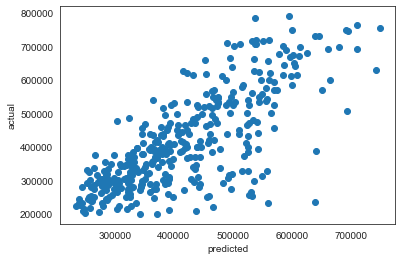

In [88]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()